## Multi-layer Perceptron

In [3]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns

# Load "Tips"b dataset
tips = sns.load_dataset("tips")

# Preprocessing
# Converting categorical variables to dummy variables
tips = pd.get_dummies(tips, drop_first = True)

# Selecting features and target (predicting "tip" based on other features)
x = tips.drop("tip", axis = 1)
y = tips["tip"]

# Splitting the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)


# Standardizing the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Building the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation = "relu",
                          input_shape = (x_train.shape[1],)),    # Input Layer
    tf.keras.layers.Dense(32, activation = "relu"),         # Hidden layer
    tf.keras.layers.Dense(1)                 # Output Layer for Regression
])

# Compile the model
model.compile(optimizer = "adam", loss = "mean_squared_error", metrics = ["mae"])

# Training the model
model.fit(x_train, y_train, epochs = 100, batch_size = 32, verbose = 1)

# Evaluating the model (using Mean Squared Error)
loss = model.evaluate(x_test, y_test, verbose = 0)
print("Mean Squared Error: ", loss[0])

C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 11.1471 - mae: 3.0348
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.9420 - mae: 2.4987 
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.8862 - mae: 2.0711 
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.4293 - mae: 1.7179 
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.6915 - mae: 1.2834 
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.1424 - mae: 1.1130 
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.8708 - mae: 1.0277 
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.5906 - mae: 0.9655 
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.4484 - mae: 0.9213 
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.4701 - mae: 0.9488 
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2221 - mae: 0.8570 
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2224 - mae: 0.8422 
Epoch 13/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


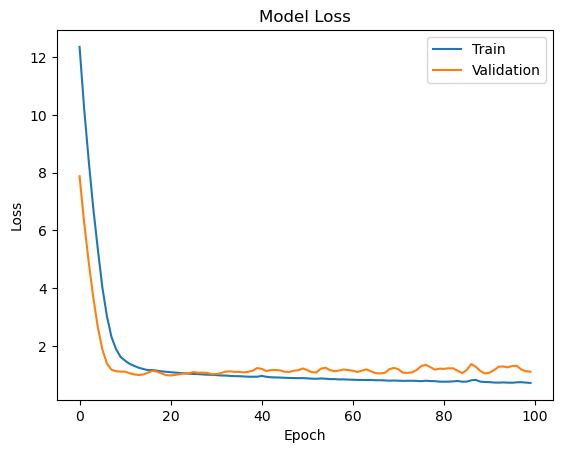

In [4]:
# Building the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation = "relu",
                          input_shape = (x_train.shape[1],)),    # Input Layer
    tf.keras.layers.Dense(32, activation = "relu"),         # Hidden layer
    tf.keras.layers.Dense(1)                 # Output Layer for Regression
])

# Compile the model
model.compile(optimizer = "adam", loss = "mean_squared_error", metrics = ["mae"])

# Train the model and plot the training and testing loss and accuracy at each epoch
history = model.fit(x_train, y_train, epochs = 100, batch_size = 32, verbose = 0, validation_data = (x_test, y_test))

# Evaluating the model (using Mean Squared Error)
loss = model.evaluate(x_test, y_test, verbose = 0)
loss

# Plotting the training and testing model
import matplotlib.pyplot as plt
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc = "upper right")
plt.show()

## EARLY STOPPING OF EPOCHS

C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


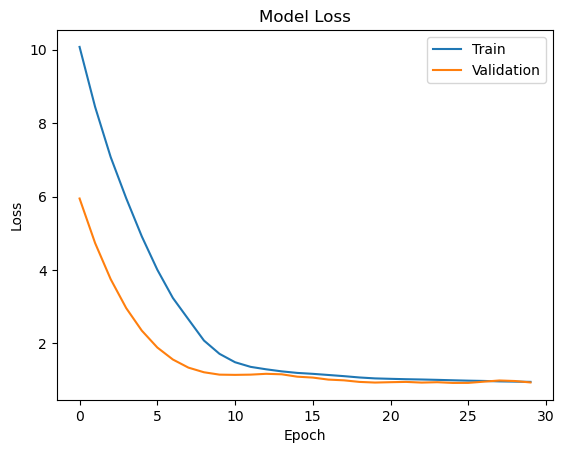

In [5]:
from tensorflow.keras.callbacks import EarlyStopping

# Building the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation = "relu",
                          input_shape = (x_train.shape[1],)),    # Input Layer
    tf.keras.layers.Dense(32, activation = "relu"),         # Hidden layer
    tf.keras.layers.Dense(1)                 # Output Layer for Regression
])

# Compile the model
model.compile(optimizer = "adam", loss = "mean_squared_error", metrics = ["mae"])


# Define the callback function
early_stopping = EarlyStopping(patience=5)



# Train the model and plot the training and testing loss and accuracy at each epoch
history = model.fit(x_train, y_train, epochs = 100, batch_size = 32, verbose = 0,
                    validation_data = (x_test, y_test), callbacks = [early_stopping])

# Evaluating the model (using Mean Squared Error)
loss = model.evaluate(x_test, y_test, verbose = 0)
loss

# Plotting the training and testing model
import matplotlib.pyplot as plt
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc = "upper right")
plt.show()